# Using Data Mining Techniques into Real Estates Industry

**Author**:  _Madalina-Alina Racovita, 1st year master's student on **Computational Optimization at Faculty of Computer Science**, UAIC, Iasi, Romania_

![title](./Images/regression.png)

<h1>Task 4 - Regression Analysis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-dependencies-&amp;-environment-configuration" data-toc-modified-id="Import-dependencies-&amp;-environment-configuration-1">Import dependencies &amp; environment configuration</a></span></li><li><span><a href="#Load-dataframes" data-toc-modified-id="Load-dataframes-2">Load dataframes</a></span></li><li><span><a href="#Preprocessing-steps" data-toc-modified-id="Preprocessing-steps-3">Preprocessing steps</a></span><ul class="toc-item"><li><span><a href="#Removing-constant-features" data-toc-modified-id="Removing-constant-features-3.1">Removing constant features</a></span></li><li><span><a href="#Replacing-the-missing-values" data-toc-modified-id="Replacing-the-missing-values-3.2">Replacing the missing values</a></span><ul class="toc-item"><li><span><a href="#Removing-columns-with-missing-percentage-$\ge$-0.95" data-toc-modified-id="Removing-columns-with-missing-percentage-$\ge$-0.95-3.2.1">Removing columns with missing percentage $\ge$ 0.95</a></span></li><li><span><a href="#Replacing-the-missing-values-correspondingly-to-the-feature-type" data-toc-modified-id="Replacing-the-missing-values-correspondingly-to-the-feature-type-3.2.2">Replacing the missing values correspondingly to the feature type</a></span></li></ul></li><li><span><a href="#Boolean-type-to-numerical" data-toc-modified-id="Boolean-type-to-numerical-3.3">Boolean type to numerical</a></span></li><li><span><a href="#Dropping-corner-cases-observations" data-toc-modified-id="Dropping-corner-cases-observations-3.4">Dropping corner cases observations</a></span></li><li><span><a href="#Constructing-new-features" data-toc-modified-id="Constructing-new-features-3.5">Constructing new features</a></span></li></ul></li><li><span><a href="#Temporal-filtration-of-the-observations" data-toc-modified-id="Temporal-filtration-of-the-observations-4">Temporal filtration of the observations</a></span></li><li><span><a href="#Features-selection" data-toc-modified-id="Features-selection-5">Features selection</a></span><ul class="toc-item"><li><span><a href="#Pearson's-correlation.-Selecting-the-most-relevant-continuous-variables" data-toc-modified-id="Pearson's-correlation.-Selecting-the-most-relevant-continuous-variables-5.1">Pearson's correlation. Selecting the most relevant continuous variables</a></span></li><li><span><a href="#One-way-ANOVA.-Correlation-between-a-categorical-and-the-continuous-target-variable" data-toc-modified-id="One-way-ANOVA.-Correlation-between-a-categorical-and-the-continuous-target-variable-5.2">One-way ANOVA. Correlation between a categorical and the continuous target variable</a></span></li></ul></li><li><span><a href="#Data-encoding" data-toc-modified-id="Data-encoding-6">Data encoding</a></span></li><li><span><a href="#Train-/-test-dataframes" data-toc-modified-id="Train-/-test-dataframes-7">Train / test dataframes</a></span></li><li><span><a href="#Evaluation-metrics" data-toc-modified-id="Evaluation-metrics-8">Evaluation metrics</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-9">Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Theoretical-concepts:-Multivariate-regression" data-toc-modified-id="Theoretical-concepts:-Multivariate-regression-9.1">Theoretical concepts: Multivariate regression</a></span></li><li><span><a href="#Recursive-Feature-Elimination" data-toc-modified-id="Recursive-Feature-Elimination-9.2">Recursive Feature Elimination</a></span></li></ul></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-10">Lasso Regression</a></span><ul class="toc-item"><li><span><a href="#Model-specification" data-toc-modified-id="Model-specification-10.1">Model specification</a></span></li></ul></li><li><span><a href="#KNN-regressor" data-toc-modified-id="KNN-regressor-11">KNN regressor</a></span><ul class="toc-item"><li><span><a href="#Finding-the-best-K-based-on-minimum-RMSLE-score" data-toc-modified-id="Finding-the-best-K-based-on-minimum-RMSLE-score-11.1">Finding the best K based on minimum RMSLE score</a></span></li></ul></li><li><span><a href="#Decission-trees-regressor" data-toc-modified-id="Decission-trees-regressor-12">Decission trees regressor</a></span></li><li><span><a href="#Regression-using-neural-networks" data-toc-modified-id="Regression-using-neural-networks-13">Regression using neural networks</a></span></li><li><span><a href="#SVR" data-toc-modified-id="SVR-14">SVR</a></span></li><li><span><a href="#Regression-models-which-use-bagging-techniques" data-toc-modified-id="Regression-models-which-use-bagging-techniques-15">Regression models which use bagging techniques</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-15.1">Random Forest</a></span></li><li><span><a href="#ExtraTrees" data-toc-modified-id="ExtraTrees-15.2">ExtraTrees</a></span></li></ul></li><li><span><a href="#Regression-models-which-use-boosting-techniques" data-toc-modified-id="Regression-models-which-use-boosting-techniques-16">Regression models which use boosting techniques</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-16.1">XGBoost</a></span></li></ul></li><li><span><a href="#Overview-on-the-constructed-models.-Which-is-the-best-one?" data-toc-modified-id="Overview-on-the-constructed-models.-Which-is-the-best-one?-17">Overview on the constructed models. Which is the best one?</a></span></li><li><span><a href="#References" data-toc-modified-id="References-18">References</a></span></li></ul></div>

## Import dependencies & environment configuration

In [1]:
# !pip install 

In [2]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
import researchpy as rp
import scipy.stats as stats

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from collections import Counter
from sklearn import metrics 

warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

## Load dataframes

The dataframes are going to be loaded in an unprocessed version since, for this task the feature selection has to be made using empirical and encapsulated manners. It is specified the fact that the features **UnitsInBuilding** and **Stories** are going to be removed from the dataframe, the regression task is going to be pursued only of the real estates geographically localized in the **Washington state**.

In [3]:
os.listdir('./../Data')

['RCON_12011.assessor.tsv',
 'RCON_53033.assessor.tsv',
 'RSFR_12011.assessor.tsv',
 'RSFR_53033.assessor.tsv']

In [4]:
df_rcon = pd.concat([pd.read_csv("./../Data/RCON_12011.assessor.tsv", sep = "\t"), 
                     pd.read_csv("./../Data/RCON_53033.assessor.tsv", sep = "\t")])
df_rsfr = pd.concat([pd.read_csv("./../Data/RSFR_12011.assessor.tsv", sep = "\t"), 
                     pd.read_csv("./../Data/RSFR_53033.assessor.tsv", sep = "\t")])

df_rcon['isRCON'] = 1
df_rsfr['isRCON'] = 0

df = pd.concat([df_rcon, df_rsfr])

In [5]:
del df['UnitsInBuilding']
del df['Stories']

In [6]:
df = df[df['State'] == 'WA']

## Preprocessing steps

### Removing constant features

The columns that have a single value in the entire dataframe are going to be dropped since they have no predictive value. Their names were detected during EDA.

In [7]:
columns_constant_features = ['AtticSqft', 'IsFixer', 'GarageNoOfCars', 'EffectiveYearBuilt', 'TotalRooms', 'State']
for current in columns_constant_features:
    del df[current]

### Replacing the missing values

#### Removing columns with missing percentage $\ge$ 0.95

The features that have a missing percentage **greater than 95%** are going to be dropped, since tey have no predictive value and  increase the model complexity with no reason.

In [8]:
column_miss_perc_ge_95 = ['DeedType', 'RoofCode', 'BuildingShapeCode', 'City', 'StructureCode']
for column in column_miss_perc_ge_95:
    del df[column]

#### Replacing the missing values correspondingly to the feature type

The missing values for the object type columns are going to be replaced with an empty string, the ones for numerical columns with 0, except from **SellPrice** which is going to be replaced with the mean corresponding to the real estates category from which is belonging: residential or RCON.

In [9]:
features_with_missing_values = ['BuildingCode', 'GarageCarportCode', 'PatioPorchCode', 'PoolCode', 'Zonning', \
                                'PropTaxAmount', 'FoundationCode', 'ExteriorCode', 'CoolingCode', 'HeatingCode', \
                                'HeatingSourceCode', 'View', 'DocType', 'TransType', 'DistressCode', 'SellPrice']

In [10]:
object_miss_values_features = []
numeric_miss_values_features = []
types = df[features_with_missing_values].dtypes

for i in range(len(types)):
    if types[i] == object:
        object_miss_values_features.append(features_with_missing_values[i])
    else:
        numeric_miss_values_features.append(features_with_missing_values[i])

for column in object_miss_values_features:
    df[column] = df[column].fillna('')
    
rcon_medium_sellprice = df_rcon['SellPrice'].mean()
rsfr_medium_sellprice = df_rsfr['SellPrice'].mean()

for column in numeric_miss_values_features:
    if column != 'SellPrice':
        df[column] = df[column].fillna(0)
        
prices = []
for (index, row) in df.iterrows():
    added = False
    if pd.isnull(row['SellPrice']):
        row['SellPrice'] = row['LastSalePrice']
    if row['SellPrice'] == 0:
        if row['isRCON'] == 1:
            prices.append(rcon_medium_sellprice)
        else:
            prices.append(rsfr_medium_sellprice)
    elif row['SellPrice'] != 0:
        prices.append(row['SellPrice'])
        
df['SellPrice'] = prices   

df.loc[(df['isRCON'] == 1) & (df['LastSalePrice'] == 0), 'LastSalePrice'] = rcon_medium_sellprice
df.loc[(df['isRCON'] == 0) & (df['LastSalePrice'] == 0), 'LastSalePrice'] = rsfr_medium_sellprice

### Boolean type to numerical

In [11]:
bool_type_columns = df.select_dtypes(include=bool).columns.tolist()
for column in bool_type_columns:
    df[column] = df[column].apply(lambda x: 0 if x == False else 1)

In [12]:
df.head()

,CountyFipsCode,BuildingCode,StructureNbr,LandSqft,LivingSqft,GarageSqft,BasementSqft,BasementFinishedSqft,Bedrooms,TotalBaths,FirePlaces,YearBuilt,Condition,ConditionCode,Quality,QualityCode,GarageCarportCode,HasPatioPorch,PatioPorchCode,HasPool,PoolCode,Zonning,LandValue,ImprovementValue,TotalValue,AssessedYear,PropTaxAmount,Zip,Latitude,Longitude,ConstructionCode,FoundationCode,ExteriorCode,CoolingCode,HeatingCode,HeatingSourceCode,IsWaterfront,View,ViewScore,LastSaleDate,LastSalePrice,DocType,TransType,ArmsLengthFlag,DistressCode,StatusDate,SellDate,SellPrice,OwnerOccupied,DistrsdProp,isRCON
0,53033,1.0,1,20939,697,0,0,0,1,1.0,1,2004,FAI,2,QAV,6,GB1,0,0.0,0,,CB,14099,124899,139000,2016,1696.0,98155,47.770,-122.303,0,0.0,0.0,0.0,,0.0,0,12.0,2,2007-10-18 00:00:00,217000.0,W,S,1,,2012-12-05 17:18:00,2007-10-18,217000.0,1,0,1
1,53033,1.0,1,3999,1440,440,0,0,3,2.0,1,2006,AVE,3,QGO,8,GA0,1,2.0,1,,URPSO,207999,221999,430000,2016,5696.0,98053,47.722,-122.030,0,0.0,0.0,0.0,2,2.0,0,0.0,1,2007-10-05 00:00:00,343750.0,W,R,1,,2012-12-05 21:54:00,2007-10-05,343750.0,0,0,1
2,53033,1.0,1,61240,1030,0,0,0,3,1.0,1,1952,AVE,3,QFA,4,,0,0.0,0,,RA5,76499,49499,126000,2016,2203.0,98038,47.406,-122.040,0,0.0,0.0,0.0,,0.0,0,15.0,3,2006-06-23 00:00:00,275000.0,W,R,1,,2017-02-17 00:00:00,2006-06-23,275000.0,1,0,1
3,53033,1.0,1,3999,1390,250,410,160,3,3.0,1,2004,AVE,3,QGO,8,GB0,0,0.0,0,,LR3,140999,444999,586000,2016,5572.0,98102,47.635,-122.324,0,0.0,0.0,0.0,2,2.0,0,0.0,2,2004-05-20 00:00:00,375000.0,,,1,,2012-12-06 05:29:00,2004-05-20,375000.0,1,0,1
4,53033,1.0,1,189350,1023,0,0,0,2,1.0,1,1978,FAI,2,QAV,6,,0,0.0,0,,RMA 1.8,52499,103499,156000,2016,1716.0,98034,47.730,-122.241,0,0.0,0.0,0.0,,0.0,0,12.0,2,1989-08-07 00:00:00,41000.0,,,1,,2017-02-17 00:00:00,1989-08-07,41000.0,0,0,1


### Dropping corner cases observations

The **real estates with a price bigger than 2.5 million US dollars** are going to be dropped since they are outliers and we want a robust model, which will learn generalities not particularities.

In [13]:
df = df.drop(df[df['SellPrice'] > 2500000].index)

### Constructing new features

Some features are going to be rebuilt **for increasing their predictive power**.

In [14]:
df['SellDate_Year'] = df['SellDate'].apply(lambda x: int(x[:4]))
df['SellDate_Month'] = df['SellDate'].apply(lambda x: int(x[5:7]))
df['SellDate_Day'] = df['SellDate'].apply(lambda x: int(x[8:]))
del df['SellDate']

df['StatusDate'] = df['StatusDate'].apply(lambda x: str(x.split()[0]))
df['SellPricePerLivingSqft'] = df['SellPrice'] / df['LivingSqft']

## Temporal filtration of the observations

**For the regression task, there are going to be kept only the records from 2009.**

In [15]:
df = df[df['SellDate_Year'] == 2009]

In [16]:
df.shape

(3264, 54)

## Features selection

Before constructing a Machine Learning model it is important to filter the features, since the features uncorrelated with the target class, complicate useless the model and increase the computational complexity. **It is desirable a model with as few features as possible, robust and with a great predictive power.** 

For instance, **it can be tolerated a small decrease of acccuracy, if the number of features used in the second model is a lot smaller.**

### Pearson's correlation. Selecting the most relevant continuous variables

The **numerical features** are going to be **filtered based on the Pearson's correlation coefficient** with the target class, **SellPrice**.

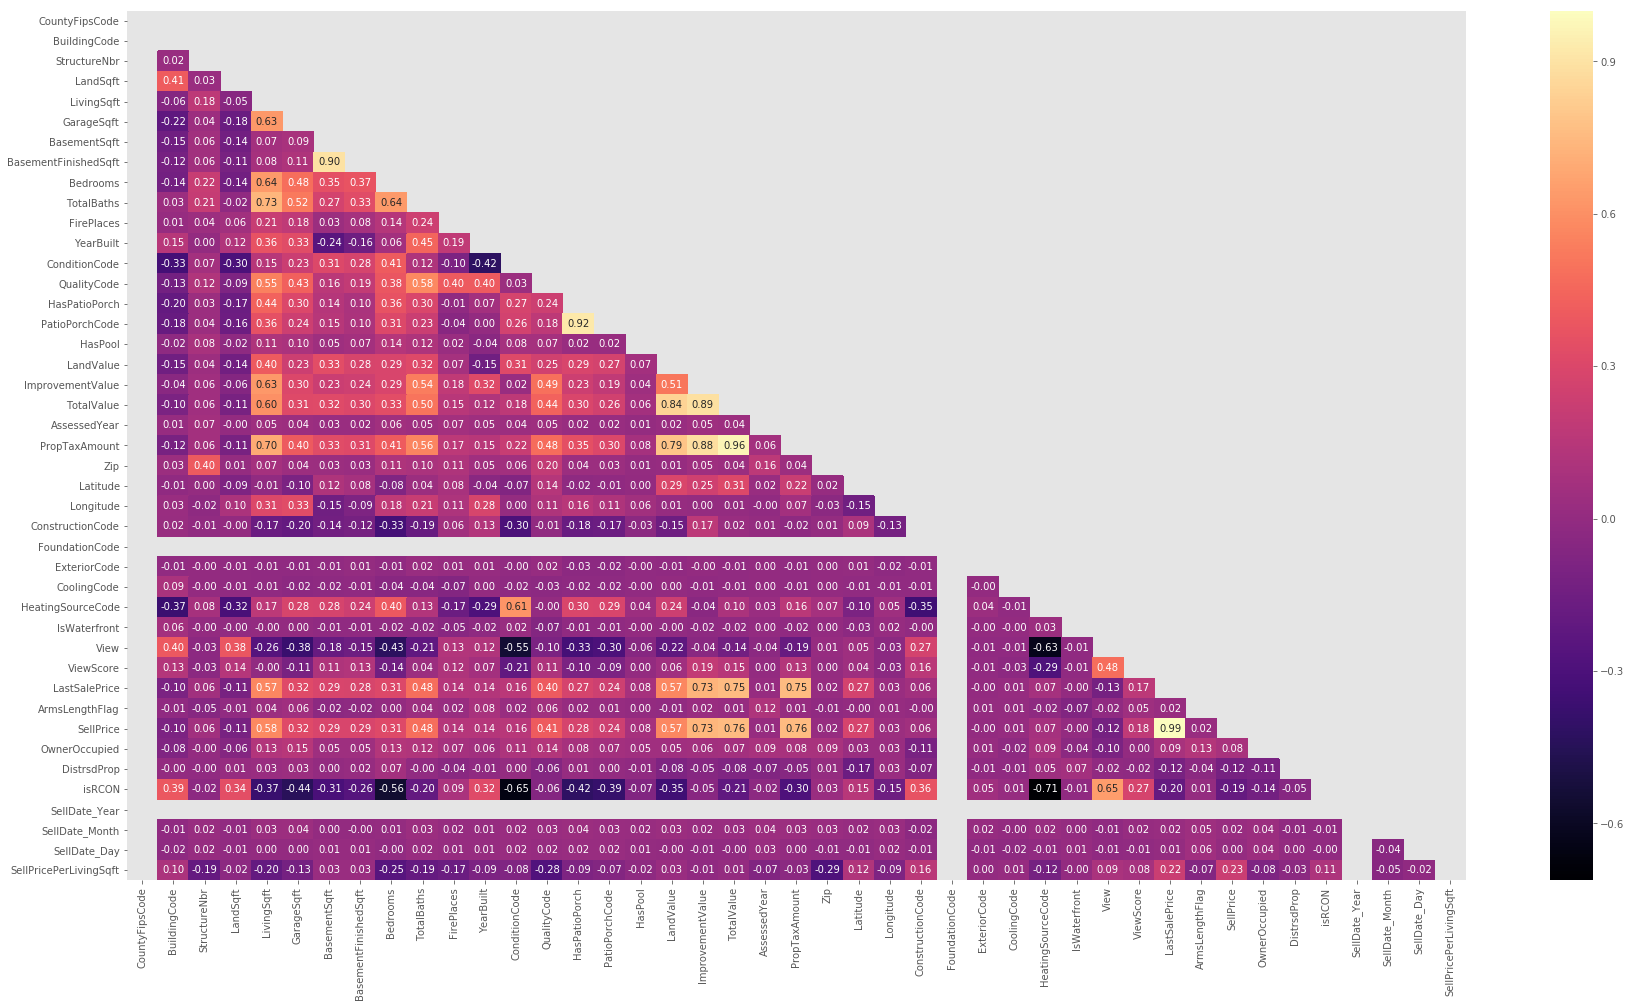

In [17]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='magma')
plt.show()

Are going to be kept the features with a correlation coefficient with the **SellPrice** variable greater than 0.08. 

In [18]:
relevant_numerical_features = []
for key in corr['SellPrice'].keys():
    if abs(corr['SellPrice'][key]) > 0.08 and key != 'SellPrice':
        relevant_numerical_features.append(key)
relevant_numerical_features

['BuildingCode',
 'LandSqft',
 'LivingSqft',
 'GarageSqft',
 'BasementSqft',
 'BasementFinishedSqft',
 'Bedrooms',
 'TotalBaths',
 'FirePlaces',
 'YearBuilt',
 'ConditionCode',
 'QualityCode',
 'HasPatioPorch',
 'PatioPorchCode',
 'HasPool',
 'LandValue',
 'ImprovementValue',
 'TotalValue',
 'PropTaxAmount',
 'Latitude',
 'View',
 'ViewScore',
 'LastSalePrice',
 'OwnerOccupied',
 'DistrsdProp',
 'isRCON',
 'SellPricePerLivingSqft']

In [19]:
str(len(corr['isRCON']) - len(relevant_numerical_features)) + ' numerical features were removed due to small correlation from a ' \
+ 'total of ' + str(len(corr['isRCON'])) + ' numerical features'

'16 numerical features were removed due to small correlation from a total of 43 numerical features'

Let's take **a glance on the features that were eliminated**.

In [20]:
list(set(corr['SellPrice'].keys()).difference(set(relevant_numerical_features))) 

['SellDate_Year',
 'AssessedYear',
 'Longitude',
 'CountyFipsCode',
 'SellDate_Day',
 'IsWaterfront',
 'CoolingCode',
 'HeatingSourceCode',
 'SellDate_Month',
 'ExteriorCode',
 'Zip',
 'StructureNbr',
 'ConstructionCode',
 'FoundationCode',
 'SellPrice',
 'ArmsLengthFlag']

The **categorical features are going to be filterd as well**, but before that we have to collect their names.

In [21]:
character_type_features = []
types = df.dtypes

for i in range(len(types)):
    if types[i] == object:
        character_type_features.append(list(df)[i])

In [22]:
len(character_type_features)

11

### One-way ANOVA. Correlation between a categorical and the continuous target variable

**The categorical features are going to be filtered by pursuing some one-way ANOVA tests.** The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

**The one-way ANOVA** compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. Specifically, it tests the null hypothesis:

**The H0 (Null Hypothesis)**: $\mu_1 = \mu_2 = \dots = \mu_k$, _where k is the cardinal of the categorical feature's set of unique values_. 

If, however, the one-way ANOVA returns a statistically significant result (p-value as close as possible to 0, preferable smaller than 0.05), we accept the **alternative hypothesis (HA)**, which is that there are at least **two group means that are statistically significantly different from each other**.

At this point, it is important to realize that the one-way ANOVA is an **omnibus test statistic** and cannot tell you which specific groups were statistically significantly different from each other, only that at least two groups were. Still, the ANOVA test will be used in order to specify if there is a relationship between SellPrice and a specific characteristic for that real estate like **Quality**.

In [23]:
def split_continuous_into_groups(categorical_feature):
    unique_values = list(df[categorical_feature].unique())
    return [list(df[df[categorical_feature] == value]['SellPrice']) for value in unique_values]

In [24]:
stats.f_oneway(*split_continuous_into_groups('Quality'))

F_onewayResult(statistic=221.86915496071904, pvalue=3.0624411556102445e-204)

There are going to be kept the features with a **p_value** smaller than 0.05.

In [25]:
len(character_type_features)

11

In [26]:
relevant_categorical_features = []
for nominal_feature in character_type_features:
    p_value = stats.f_oneway(*split_continuous_into_groups(nominal_feature))[1]
    if p_value <= 0.05:
        relevant_categorical_features.append(nominal_feature)
    print(nominal_feature + ' & SellPrice one-way ANOVA p-value = ' + str(p_value))    

Condition & SellPrice one-way ANOVA p-value = 1.0476502689947865e-39
Quality & SellPrice one-way ANOVA p-value = 3.0624411556102445e-204
GarageCarportCode & SellPrice one-way ANOVA p-value = 1.8985869076703572e-44
PoolCode & SellPrice one-way ANOVA p-value = 4.138176716457281e-10
Zonning & SellPrice one-way ANOVA p-value = 1.687151304771989e-139
HeatingCode & SellPrice one-way ANOVA p-value = 2.3930227629827596e-55
LastSaleDate & SellPrice one-way ANOVA p-value = 0.31543477820861304
DocType & SellPrice one-way ANOVA p-value = 3.3236434940582292e-22
TransType & SellPrice one-way ANOVA p-value = 7.911543195150665e-09
DistressCode & SellPrice one-way ANOVA p-value = 1.0868058679932574e-24
StatusDate & SellPrice one-way ANOVA p-value = 2.8422198798938282e-08


In [27]:
'The features that were removed due to one-way ANOVA tests results were: ' + \
str(set(character_type_features).difference(set(relevant_categorical_features))) 

"The features that were removed due to one-way ANOVA tests results were: {'LastSaleDate'}"

In [28]:
relevant_categorical_features

['Condition',
 'Quality',
 'GarageCarportCode',
 'PoolCode',
 'Zonning',
 'HeatingCode',
 'DocType',
 'TransType',
 'DistressCode',
 'StatusDate']

In [29]:
relevant_features = relevant_numerical_features + relevant_categorical_features + ['SellPrice']
len(relevant_features)

38

Therefore, after the filtration based on the Pearson's correlation coefficient and on one-way ANOVA tests values **38 features were kept as prectors for the ML model**.

## Data encoding

The dataframe is going to be encoded so that the categorical features are going to be transformed into numerical ones, by a simmilar One-Hot encoding process. The numerical variables are going to be kept unmodified.

In [30]:
encoded_df = pd.get_dummies(df[relevant_features + ['SellDate_Month']])
encoded_df['SellPrice'] = df['SellPrice']

In [31]:
len(list(encoded_df))

493

In [32]:
encoded_df.head(3)

,BuildingCode,LandSqft,LivingSqft,GarageSqft,BasementSqft,BasementFinishedSqft,Bedrooms,TotalBaths,FirePlaces,YearBuilt,ConditionCode,QualityCode,HasPatioPorch,PatioPorchCode,HasPool,LandValue,ImprovementValue,TotalValue,PropTaxAmount,Latitude,View,ViewScore,LastSalePrice,OwnerOccupied,DistrsdProp,isRCON,SellPricePerLivingSqft,SellPrice,SellDate_Month,Condition_AVE,Condition_FAI,Condition_GOO,Condition_POO,Condition_VGO,Quality_000,Quality_QAV,Quality_QEX,Quality_QFA,Quality_QGO,Quality_QPO,GarageCarportCode_,GarageCarportCode_C 1,GarageCarportCode_C 2,GarageCarportCode_G 0,GarageCarportCode_G 1,GarageCarportCode_G 2,GarageCarportCode_GA0,GarageCarportCode_GA1,GarageCarportCode_GA2,GarageCarportCode_GB0,GarageCarportCode_GB1,GarageCarportCode_GB2,GarageCarportCode_GB6,GarageCarportCode_GD0,PoolCode_,PoolCode_Y,Zonning_A10,Zonning_A35,Zonning_AI2,Zonning_C1,Zonning_C140,Zonning_C165,Zonning_C240,Zonning_C3,Zonning_CA,Zonning_CB,Zonning_CBD 1B,Zonning_CBD 4,Zonning_CBD 6,Zonning_CD,Zonning_CE,Zonning_CF,Zonning_DC,Zonning_DMC 240290400,Zonning_DMC160,Zonning_DMC240,Zonning_DMC65,Zonning_DMRC 12565,Zonning_DMRC 240125,Zonning_DMRR 12565,Zonning_DMRR 24065,Zonning_DMRR 8565,Zonning_DNTNMU,Zonning_DNTNO1,Zonning_DNTNOB,Zonning_DNTNR,Zonning_DOC2 50030050,Zonning_DR,Zonning_DUC,Zonning_EH,Zonning_F,Zonning_GC,Zonning_GDC,Zonning_HDR,Zonning_HR,Zonning_IB U45,Zonning_IDM 7585150,Zonning_IDM7585,Zonning_L2,Zonning_LDR,Zonning_LDT,Zonning_LR1,Zonning_LR2,Zonning_LR2 RC,Zonning_LR3,Zonning_LR3 PUD,Zonning_LR3 RC,Zonning_MC,Zonning_MF2,Zonning_MF3,Zonning_MFH,Zonning_MFM,Zonning_MHO,Zonning_MR,Zonning_MRG,Zonning_MRH,Zonning_MRM,Zonning_MRRC,Zonning_MRT12,Zonning_MRT16,Zonning_MU,Zonning_MUR,Zonning_MUR35,Zonning_MUR45,Zonning_MUR70,Zonning_NC130,Zonning_NC140,Zonning_NC240,Zonning_NC2P40,Zonning_NC2P65,Zonning_NC340,Zonning_NC365,Zonning_NC385,Zonning_NC3P40,Zonning_NC3P65,Zonning_NRH 3,Zonning_O,Zonning_OT,Zonning_PLA 15B,Zonning_PLA 17,Zonning_PLA 2,Zonning_PLA 5D,Zonning_PLA 6A,Zonning_PLA 7B,Zonning_PMM85,Zonning_PSM100,Zonning_PUD,"Zonning_R 2800, OP",Zonning_R 4000,"Zonning_R 5400A, OP",Zonning_R 5400D,Zonning_R 7200,Zonning_R 8400,Zonning_R 9600,Zonning_R1,Zonning_R1.8,Zonning_R10,Zonning_R12,Zonning_R12.5,Zonning_R12P,Zonning_R12PSO,Zonning_R14,Zonning_R15,Zonning_R16,Zonning_R18,Zonning_R18P,Zonning_R18PSO,Zonning_R18SO,Zonning_R2,Zonning_R2.5,Zonning_R20,Zonning_R24,Zonning_R24SO,Zonning_R3,Zonning_R3.5,Zonning_R30,Zonning_R4,Zonning_R4.5,Zonning_R48,Zonning_R4C,Zonning_R4P,Zonning_R5,Zonning_R6,Zonning_R6P,Zonning_R6PSO,Zonning_R7,Zonning_R7.2,Zonning_R7.5,Zonning_R8,Zonning_R8.4,Zonning_R8P,Zonning_R9.6,Zonning_RA10,Zonning_RA10PSO,Zonning_RA10SO,Zonning_RA2.5,Zonning_RA2.5SO,Zonning_RA3600,Zonning_RA5,Zonning_RA5P,Zonning_RC,Zonning_RL,Zonning_RM,Zonning_RM 1.8,Zonning_RM 3.6,Zonning_RM 5.0 (1),Zonning_RM12,Zonning_RM1800,Zonning_RM24,Zonning_RM2400,Zonning_RM3600,Zonning_RM48,Zonning_RM900,Zonning_RM900A,Zonning_RMA 1.8,Zonning_RMA 2.4,Zonning_RMA 3.6,Zonning_RMF,Zonning_RO,Zonning_RS,Zonning_RS 10000,Zonning_RS 12.5,Zonning_RS 15000,Zonning_RS 20000,Zonning_RS 5,Zonning_RS 6,Zonning_RS 6.3,Zonning_RS 7.2,Zonning_RS 7200,Zonning_RS 8.5,Zonning_RS 9600,Zonning_RS12000,Zonning_RS15,Zonning_RS15000,Zonning_RS5,Zonning_RS7.2,Zonning_RS7200,Zonning_RS8400,Zonning_RS9.6,Zonning_RS9600,Zonning_RSA 4,Zonning_RSA 6,Zonning_RSA 8,Zonning_RSLTC,Zonning_RSX 35,Zonning_RSX 7.2,Zonning_RSX 8.5,Zonning_SF 5000,Zonning_SF 7200,Zonning_SF 9600,Zonning_SFD,Zonning_SFE,Zonning_SFS,Zonning_SFSL,Zonning_SM85,Zonning_SR1,Zonning_SR3,Zonning_SR4.5,Zonning_SR6,Zonning_SR8,Zonning_TC,Zonning_UL7200,Zonning_UM3600,Zonning_UR,Zonning_URPSO,Zonning_UV,Zonning_UVEV,Zonning_WD II,HeatingCode_,HeatingCode_11,HeatingCode_12,HeatingCode_13,HeatingCode_2,HeatingCode_3,HeatingCode_4,HeatingCode_5,HeatingCode_9,HeatingCode_Y,DocType_,DocType_G,DocType_T,DocType_U,DocType_W,TransType_,TransType_C,TransType_L,TransType_R,TransType_S,TransType_U,DistressCode_,D

Since the number of features from the encoded dataframe is quite big and this will increase the complexity of the computations for the ML models, I am going to filter as well these features, by **removing the ones with a Pearson's correlation coefficient smaller than 0.08**, analogically with the previous filtration step on the initial dataframe.

In [33]:
corr = encoded_df.corr()
relevant_features_from_encoded_df = []
for key in corr['SellPrice'].keys():
    if abs(corr['SellPrice'][key]) > 0.08 and key != 'SellPrice':
        relevant_features_from_encoded_df.append(key)

In [34]:
len(relevant_features_from_encoded_df)

69

From a **total of 492 variables**, **69 are going to be kept** for model building. The month in which the real estates are sold won't be taken into consideration since it is not correlated enough with the target variable. It will be included for now in the dataframes for the temporal analysis.

In [35]:
encoded_df = encoded_df[relevant_features_from_encoded_df + ['SellDate_Month', 'SellPrice']]

## Train / test dataframes 

The regression task mentions the fact that for the **test dataframes** there are going to be considered **the observations from June and November 2009, from WA**, while the **training dataframes are going to be formed of the observations from a few months earlier**. For instance if the test dataframe is formed of the records from June 2009, the  training dataframe is going to be constituted by the records from January untill end of May 2009. 

Let's take a look on the histogram of the monthly sales from 2009.

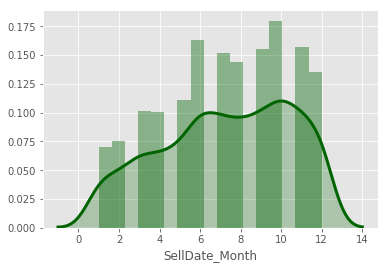

In [36]:
sns.distplot(df['SellDate_Month'], hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color='darkgreen')

In [37]:
encoded_df[encoded_df['SellDate_Month']<6]['SellDate_Month'].shape

(967,)

In [38]:
encoded_df[encoded_df['SellDate_Month']==6]['SellDate_Month'].shape

(345,)

In [39]:
encoded_df[(encoded_df['SellDate_Month']>7) & (encoded_df['SellDate_Month']<11)]['SellDate_Month'].shape

(1014,)

In [40]:
encoded_df[encoded_df['SellDate_Month']==11]['SellDate_Month'].shape

(332,)

For maintaining a proportion of 3/4 train 1/4 test with aproximation, there are going to be considered as a training set the **records from January until end of May (967 records)** for predicting the sell prices for the houses **sold in June 2009 (345 records)**. For predicting the sell prices for the properties sold in **November 2009 (332 records)**, the training set will be formed of the records **from August until October 2009 (1014 observations)**.

In [41]:
train_test = {
    'for_June_prediction': {'X_train' : encoded_df[encoded_df['SellDate_Month']<6][relevant_features_from_encoded_df],
                            'y_train': encoded_df[encoded_df['SellDate_Month']<6]['SellPrice'],
                            'X_test' : encoded_df[encoded_df['SellDate_Month']==6][relevant_features_from_encoded_df],
                            'y_test': encoded_df[encoded_df['SellDate_Month']==6]['SellPrice']
                           },
    'for_November_prediction': {'X_train' : encoded_df[(encoded_df['SellDate_Month']>7) & \
                                                       (encoded_df['SellDate_Month']<11)] \
                                                      [relevant_features_from_encoded_df],
                                'y_train' : encoded_df[(encoded_df['SellDate_Month']>7) & \
                                                       (encoded_df['SellDate_Month']<11)]['SellPrice'],
                                'X_test' : encoded_df[encoded_df['SellDate_Month']==11][relevant_features_from_encoded_df],
                                'y_test' : encoded_df[encoded_df['SellDate_Month']==11]['SellPrice']
                               }
}

## Evaluation metrics

Concerning the **evaluation metrics** for each regressions model **will be reported the absolute and the relative error, the  r squared and RMSE and RMSLE scores**. 

**Absolute Error = |Actual Value - Measured Value|** \
**Relative Error = Absolute Error / Known Value** (The relative error can be expressed as well as a percentage.)


The following implementation will compute the **RMSE** score that consists in the evaluation metric for the final model. 

I am going to use as well the **RMSLE score (Root Mean Squared Logarithmic Error)** (by computing the logarithm over predicted and target values, errors occurred from estimating badly an expensive house will have the same impact on the model as well as errors occurred from bad cheap house estimations): $ \epsilon_{RMSLE} = \sqrt{\frac{1}{n} \sum\limits_{i=1}^{n}{(log(p_i + 1) - log(a_i + 1))^2}}$

In [42]:
def rmse(y_pred, y_test):
    return np.sqrt(sum([(y_pred[i] - y_test[i])**2 for i in range(len(y_test))]) / len(y_test))

In [43]:
def rmsle(y_pred, y_test):
    for i in range(len(y_pred)):
        if y_pred[i] < 0:
            y_pred[i] = 0
            print(y_pred[i])
    return np.sqrt(sum([(np.log(y_pred[i] + 1) - np.log(y_test[i] + 1))**2 for i in range(len(y_test))]) / len(y_test))

In [44]:
def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean([np.abs((y_test[i] - y_pred[i]) / y_test[i]) for i in range(len(y_test))])*100

## Linear Regression

### Theoretical concepts: Multivariate regression

Given a data set of n statistical units, a linear regression model assumes that the relationship between the dependent variable y and the p-vector of regressors x is linear. This relationship is modeled through a disturbance term or error variable ε — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form y = $ X \beta + \epsilon $  

Multiple linear regression (MLR), also known simply as multivariate regression, is a statistical technique that uses more explanatory variables to predict the outcome of a response variable.

In essence, multiple regression is the extension of **ordinary least-squares (OLS) regression** that involves more than one explanatory variable.

The Formula for Multiple Linear Regression is: $ y_i = \beta_0 + \beta_1 x_{i_1} + \beta_2 x_{i_2} + \dots + \beta_p x_{i_p} + \epsilon $, for $ i \in \overline{1,n} $ where: 
-  n is the number of observations
-  $y_i$  is the dependent variable
-  each $x_i$ is an expanatory variable
-  $\beta_0$ is y-intercept (constant term)
-  each $\beta_p$ is the slope coefficient for its corresponding explanatory variable 
-  $\epsilon$ is the model's error term (also known as residuals).

### Recursive Feature Elimination

The **Recursive Feature Elimination (RFE) method** works by recursively removing attributes and building a model based on multivariate regression with those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def get_rfe_columns(which_prediction):    
    model = LinearRegression()

    #Initializing RFE model
    rfe = RFE(model, 30) # select  the best subset with size 15

    #Transforming data using RFE
    x_rfe = rfe.fit_transform(train_test[which_prediction]['X_train'], train_test[which_prediction]['y_train'])  

    #Fitting the data to model
    model.fit(x_rfe,train_test[which_prediction]['y_train'])

    print(rfe.support_)
    print(rfe.ranking_)

    def get_selected_columns(support_rfe, df):
        selected_columns = []
        for i in range(len(list(df))):
            if support_rfe[i] == True:
                selected_columns.append(list(df)[i])
        return selected_columns

    selected_columns = get_selected_columns(rfe.support_, train_test[which_prediction]['X_train'])
    return selected_columns

selected_columns_june = get_rfe_columns('for_June_prediction')

[False False False False False False False  True False False False  True
 False False  True False False False False  True False  True False False
 False  True False False False False  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True  True False
 False  True False  True False False False  True False False  True  True
  True  True False False False False False  True  True]
[25 35 29 28 33 30 22  1  9 31  4  1  6 13  1 19 18 20 34  1 24  1 32  5
 10  1 27 16 14 17  1  1  1  1  7 12  1  1  1  1  1  1  1  1  1  1  1 37
  8  1 26  1  3 15 11  1 23 36  1  1  1  1 40 38 39  2 21  1  1]


In [46]:
selected_columns_november = get_rfe_columns('for_November_prediction')

[False False False False False False False  True False False  True  True
 False False  True False False False False  True False False False False
 False  True False  True  True  True  True  True  True  True False False
 False False  True  True False  True  True  True  True  True  True  True
 False False  True  True False False False  True False  True False False
  True False  True False  True False False False  True]
[25 39 33 37 35 34 28  1 14 31  1  1 23 20  1  9 11 10 36  1 26  3 38 15
 32  1 29  1  1  1  1  1  1  1 22 12 18 13  1  1 19  1  1  1  1  1  1  1
 16  4  1  1  6 17  7  1  5  1 24  2  1 27  1 40  1 30 21  8  1]


In [47]:
linear_regression_model = LinearRegression()

def get_results_given_model(model_june, model_november, selected_columns_june, selected_columns_november):
    r_sq = []
    
    model_june.fit(train_test['for_June_prediction']['X_train'][selected_columns_june], 
              train_test['for_June_prediction']['y_train'])
    r_sq.append(model_june.score(train_test['for_June_prediction']['X_test'][selected_columns_june], 
                            train_test['for_June_prediction']['y_test']))
    y_june = [list(model_june.predict(train_test['for_June_prediction']['X_test'][selected_columns_june])), 
              list(train_test['for_June_prediction']['y_test'])]

    model_november.fit(train_test['for_November_prediction']['X_train'][selected_columns_november], 
              train_test['for_November_prediction']['y_train'])
    r_sq.append(model_november.score(train_test['for_November_prediction']['X_test'][selected_columns_november], 
                            train_test['for_November_prediction']['y_test']))
    y_november = [list(model_november.predict(train_test['for_November_prediction']['X_test'][selected_columns_november])), 
                  list(train_test['for_November_prediction']['y_test'])]
    
    return y_june, y_november, r_sq

In [48]:
from sklearn.metrics import mean_absolute_error

def get_evaluation_metrics(y_pred, y_test, r_sq):
    textstr = '\n'.join((r'$\mathrm{Correlation}=%.5f$' % (np.corrcoef(y_pred, y_test)[0,1], ),
                         r'$\mathrm{RMSE}=%.5f$' % (rmse(y_pred, y_test), ),
                         r'$\mathrm{RMSLE}=%.5f$' % (rmsle(y_pred, y_test), ),
                         r'$\mathrm{Mean\ absolute\ error}=%.5f$' % (mean_absolute_error(y_test, y_pred), ),
                          r'$\mathrm{Mean\ absolute\ percentage\ error}=%.5f$' % (mean_absolute_percentage_error(y_test,
                                                                                                                y_pred), ),
                         r'$\mathrm{R-squared}=%.5f$' % (r_sq, )
                        ))
    return textstr

In [49]:
def return_regression_results(y_june, y_november, cmap_index, model_naming, r_sq):
    cmaps = ['viridis', 'plasma', 'inferno', 'cubehelix']
    fig, ax = plt.subplots(1,2,figsize=(20,20))

    plt.subplot(2,2,1)
    
    plt.title('June sell prices predictions using ' + model_naming)
    points = plt.scatter(list(y_june[0]), list(y_june[1]), c=y_june[1], s=20, cmap=cmaps[cmap_index[0]], marker="1")
    plt.colorbar(points)
    
    ax = sns.regplot(x=list(y_june[0]), y=list(y_june[1]), scatter=False, color=".1")
    
    plt.xlabel('predicted price', fontsize=12)
    plt.ylabel('target price', fontsize=12)
    
    textstr = get_evaluation_metrics(list(y_june[0]), list(y_june[1]), r_sq[0])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.subplot(2,2,2)
    
    
    plt.title('November sell prices predictions using ' + model_naming)
    points = plt.scatter(list(y_november[0]), list(y_november[1]), c=y_november[1], s=20, cmap=cmaps[cmap_index[1]], marker="1")
    plt.colorbar(points)
    
    ax = sns.regplot(x=list(y_november[0]), y=list(y_november[1]), scatter=False, color=".1")
    
    plt.xlabel('predicted price', fontsize=12)
    plt.ylabel('target price', fontsize=12)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    textstr = get_evaluation_metrics(list(y_november[0]), list(y_november[1]), r_sq[1])
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.show()

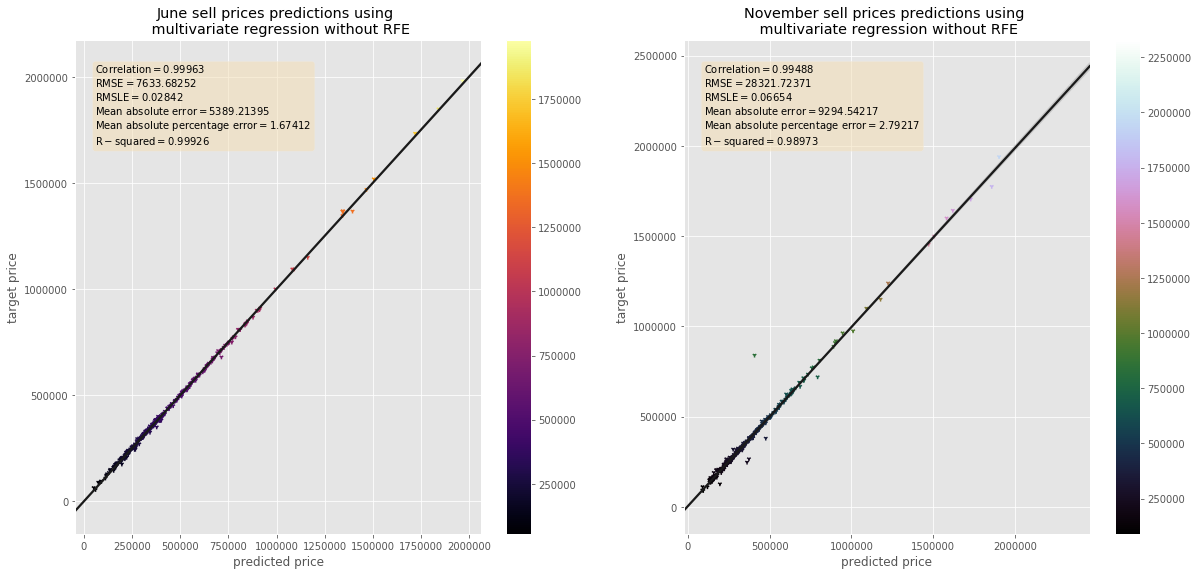

In [50]:
y_june, y_november, r_sq = get_results_given_model(linear_regression_model, linear_regression_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n multivariate regression without RFE", r_sq)

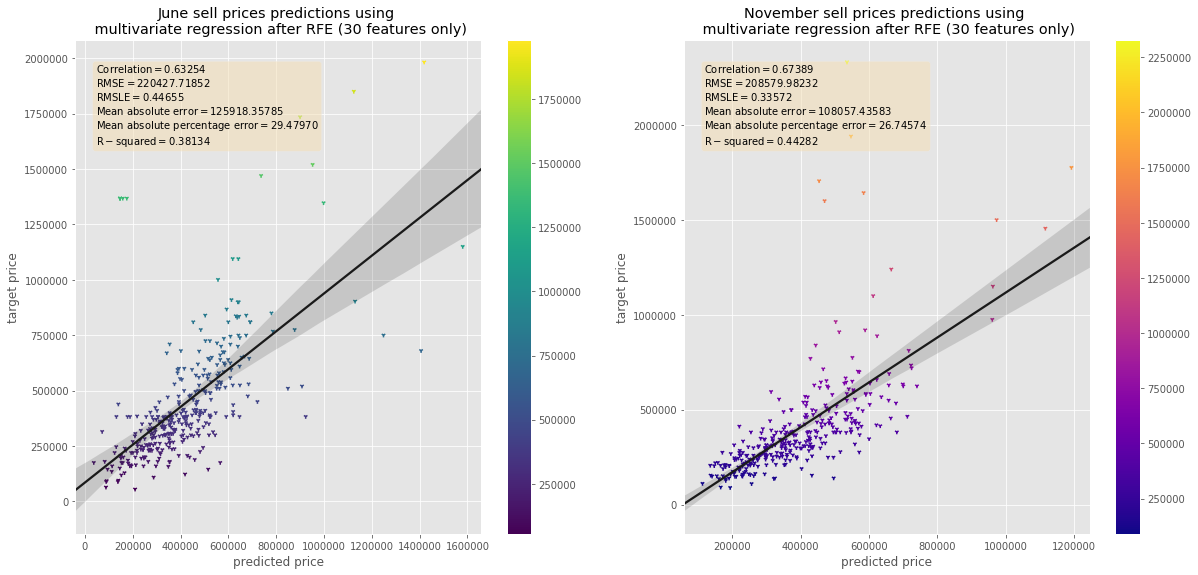

In [51]:
y_june, y_november, r_sq = get_results_given_model(linear_regression_model, linear_regression_model,
                                                   selected_columns_june, selected_columns_november)
return_regression_results(y_june, y_november, [0, 1], "\n multivariate regression after RFE (30 features only)", r_sq)

## Lasso Regression

Lasso, or **Least Absolute Shrinkage and Selection Operator** adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called **L2 penalty**), lasso _penalizes the sum of their absolute values_ (**L1 penalty**). As a result, for high values of $ \lambda $ , many coefficients are exactly zeroed under lasso (this is why Lasso is computing sot of a feature selection as well).

### Model specification

Under lasso, the loss function is defined as: $ L_{lasso}(\widehat{\beta}) = \sum_{i=1}^{n}(y_i - x_i' \widehat{\beta})^2 + \lambda \sum_{j=1}^{m} |\widehat{\beta}_j | $.

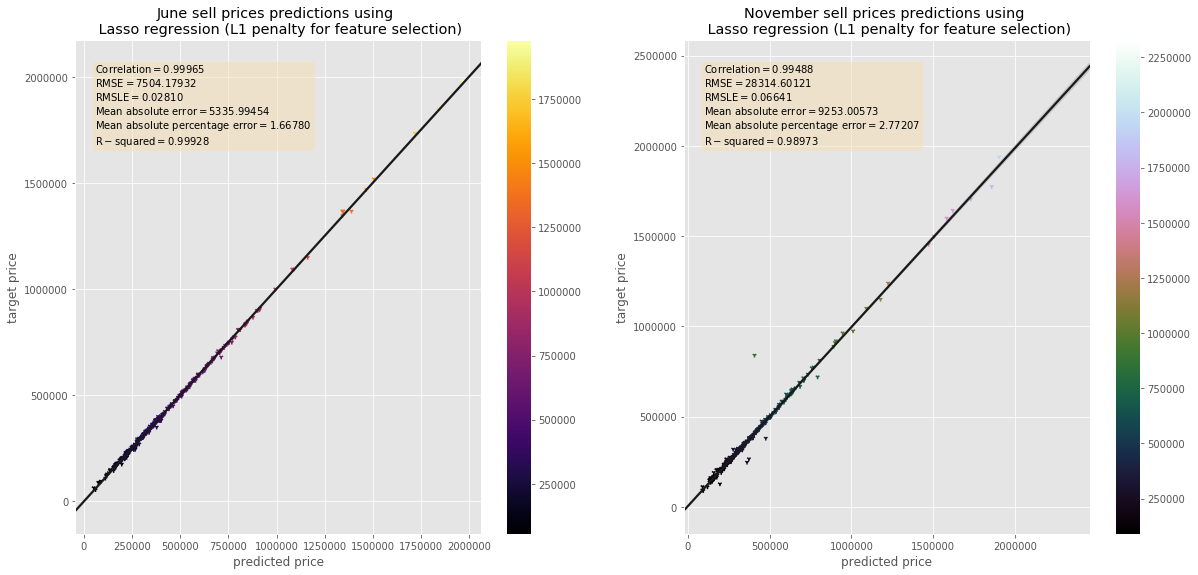

In [52]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
y_june, y_november, r_sq = get_results_given_model(lasso_model, lasso_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n Lasso regression (L1 penalty for feature selection)", r_sq)

## KNN regressor

### Finding the best K based on minimum RMSLE score

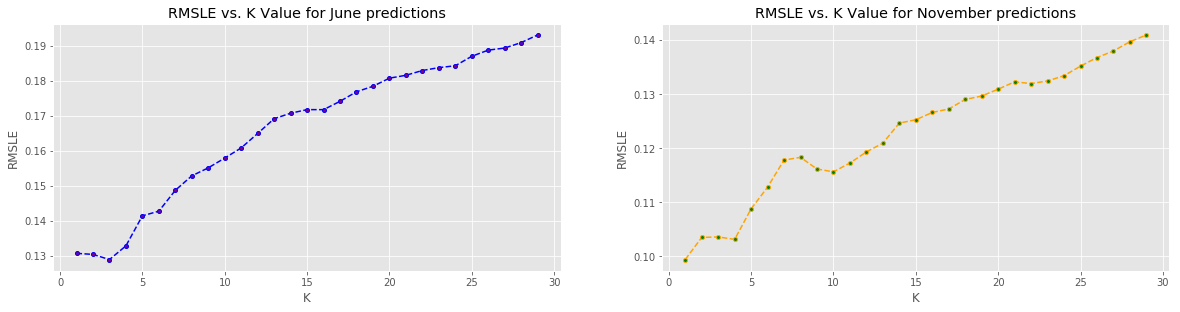

In [53]:
from sklearn.neighbors import KNeighborsRegressor

rmsles_june = []
rmsles_november = []

for i in range(1, 30):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    y_june, y_november, r_sq = get_results_given_model(knn_model, knn_model,
                                                       relevant_features_from_encoded_df, 
                                                       relevant_features_from_encoded_df)
    rmsles_june.append(rmsle(y_june[0], y_june[1]))
    rmsles_november.append(rmsle(y_november[0], y_november[1]))

fig, ax = plt.subplots(1,2,figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(range(1,30), rmsles_june, color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='purple', markersize=4)
plt.title('RMSLE vs. K Value for June predictions')
plt.xlabel('K')
plt.ylabel('RMSLE')

plt.subplot(2,2,2)
plt.plot(range(1,30), rmsles_november, color='orange', 
         linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=4)
plt.title('RMSLE vs. K Value for November predictions')
plt.xlabel('K')
plt.ylabel('RMSLE')
plt.show()

In [54]:
best_k_june = np.argmin(rmsles_june) + 1
best_k_june

3

In [55]:
best_k_november = np.argmin(rmsles_november) + 1
best_k_november

1

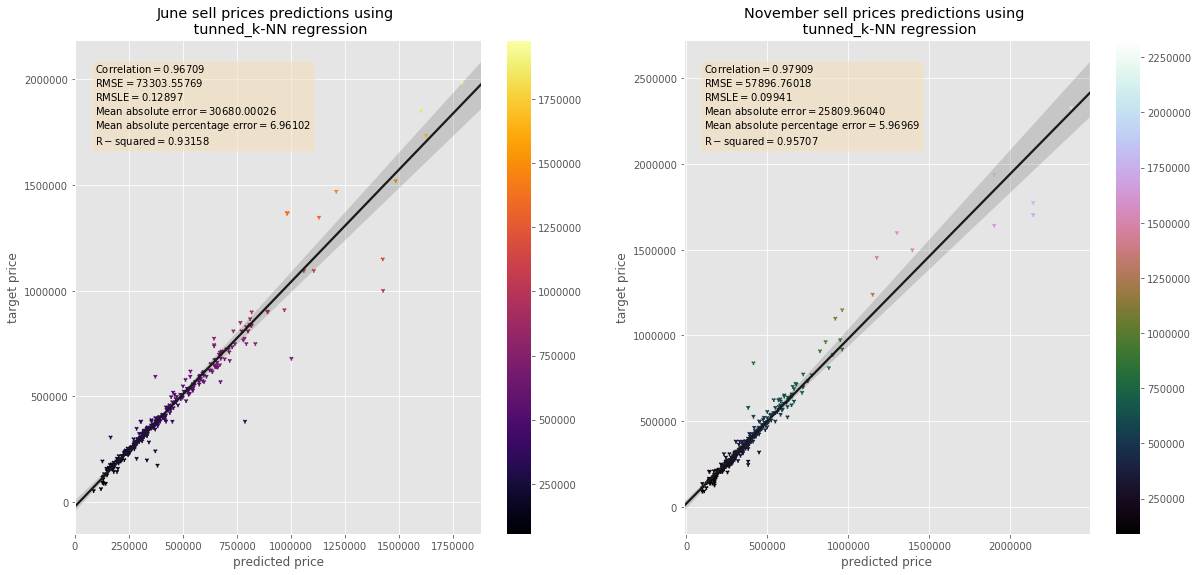

In [56]:
knn_model_june = KNeighborsRegressor(n_neighbors=best_k_june)
knn_model_november = KNeighborsRegressor(n_neighbors=best_k_november)


y_june, y_november, r_sq = get_results_given_model(knn_model_june, knn_model_november, 
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n tunned_k-NN regression", r_sq)

## Decission trees regressor

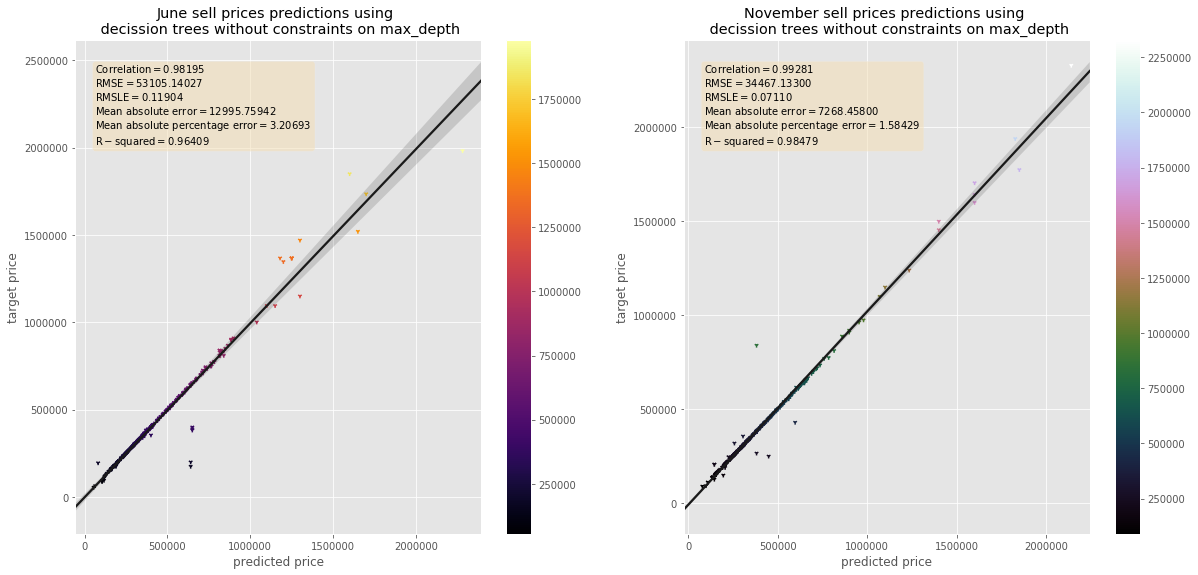

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)

y_june, y_november, r_sq = get_results_given_model(dt_model, dt_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n decission trees without constraints on max_depth", r_sq)

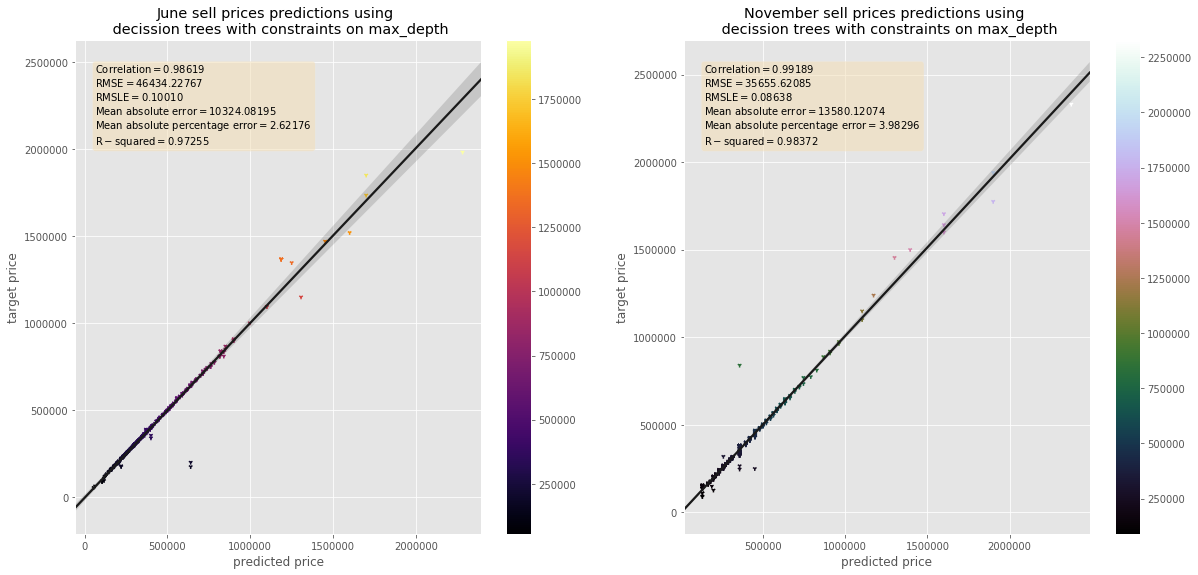

In [58]:
dt_model_june = DecisionTreeRegressor(max_depth=10, random_state=0)
dt_model_november = DecisionTreeRegressor(max_depth=6, random_state=0)
y_june, y_november, r_sq = get_results_given_model(dt_model_june, dt_model_november,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n decission trees with constraints on max_depth", r_sq)

## Regression using neural networks

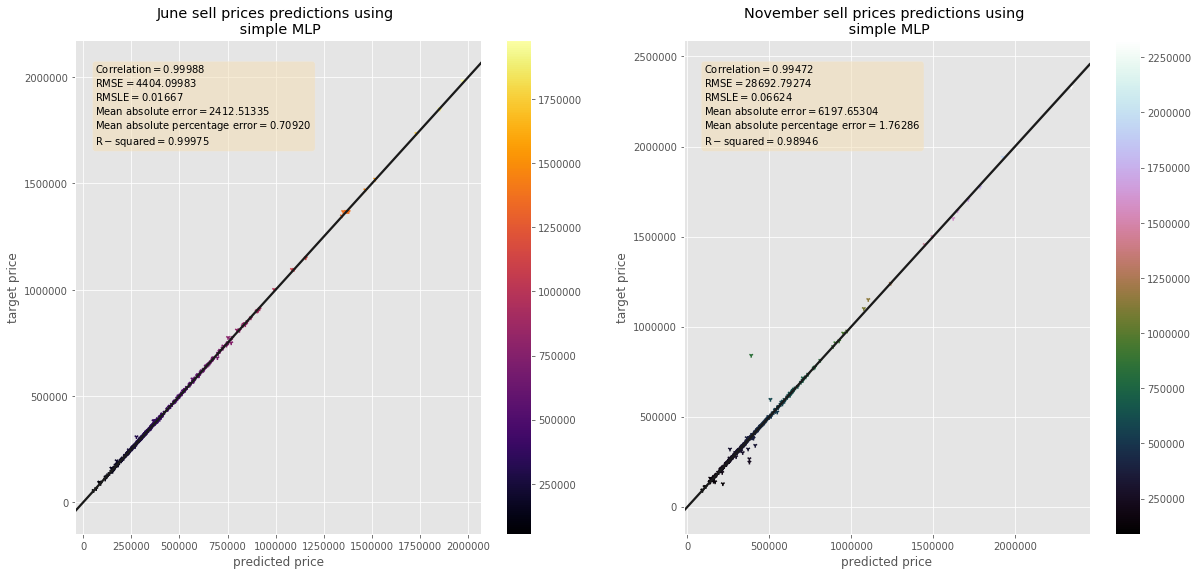

In [59]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(solver='lbfgs', alpha=1e-4,
                        hidden_layer_sizes=(100,), 
                        random_state=1)

y_june, y_november, r_sq = get_results_given_model(mlp_model, mlp_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n simple MLP", r_sq)

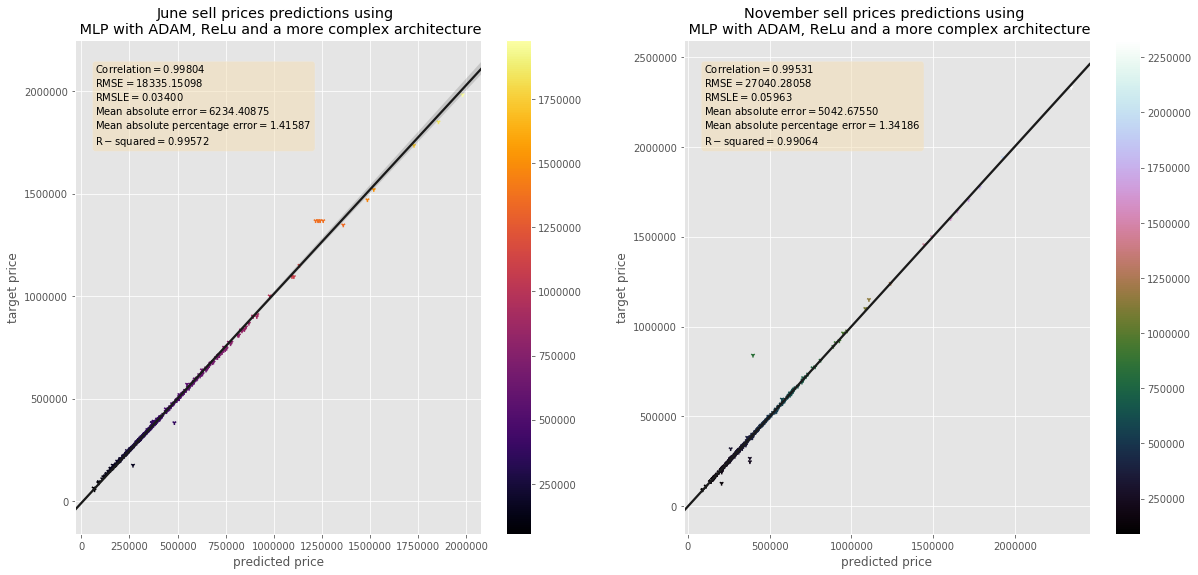

In [60]:
mlp_model = MLPRegressor(solver='adam', activation='relu', 
                        alpha=1e-4, #regularization parameter for L2
                        hidden_layer_sizes=(150, 50, 10, 2), 
                        early_stopping=True,
                        random_state=1)

y_june, y_november, r_sq = get_results_given_model(mlp_model, mlp_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n MLP with ADAM, ReLu and a more complex architecture", r_sq)

## SVR

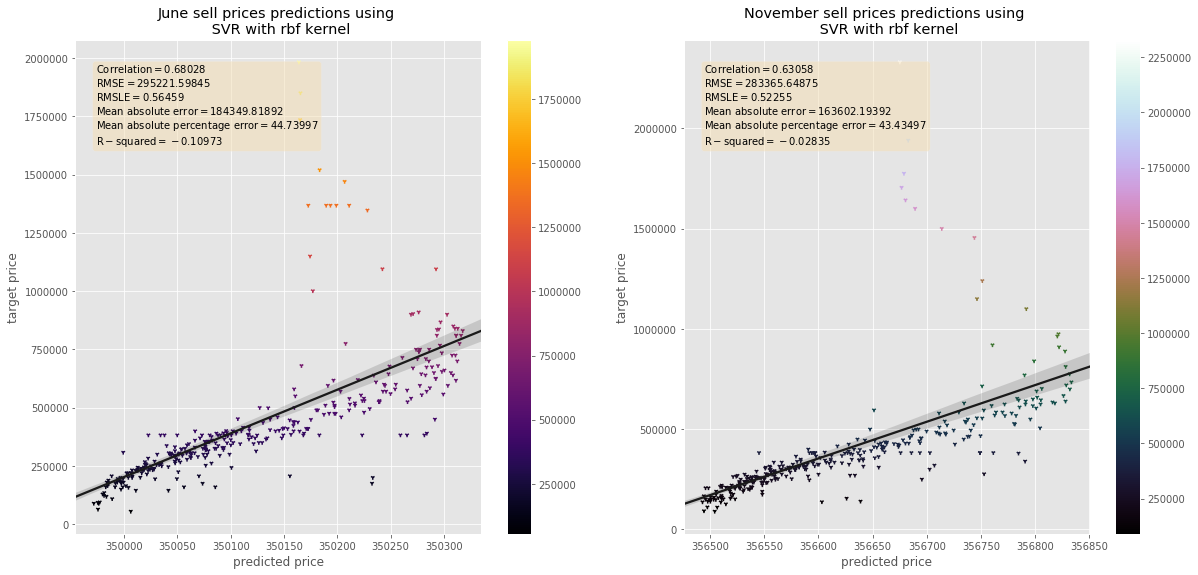

In [61]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

y_june, y_november, r_sq = get_results_given_model(svr_model, svr_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n SVR with rbf kernel", r_sq)

In [62]:
rmsles_june = []
rmsles_november = []

for kernel in ['poly', 'sigmoid', 'rbf']:
    svr_model = SVR(kernel=kernel, C=1.0, epsilon=0.2)
    y_june, y_november, r_sq = get_results_given_model(svr_model, svr_model,
                                                       relevant_features_from_encoded_df, 
                                                       relevant_features_from_encoded_df)
    rmsles_june.append(rmsle(y_june[0], y_june[1]))
    rmsles_november.append(rmsle(y_november[0], y_november[1]))

In [63]:
best_kernel_june = ['poly', 'sigmoid', 'rbf'][np.argmin(rmsles_june)]
best_kernel_june

'poly'

In [64]:
best_kernel_november = ['poly', 'sigmoid', 'rbf'][np.argmin(rmsles_november)]
best_kernel_november

'poly'

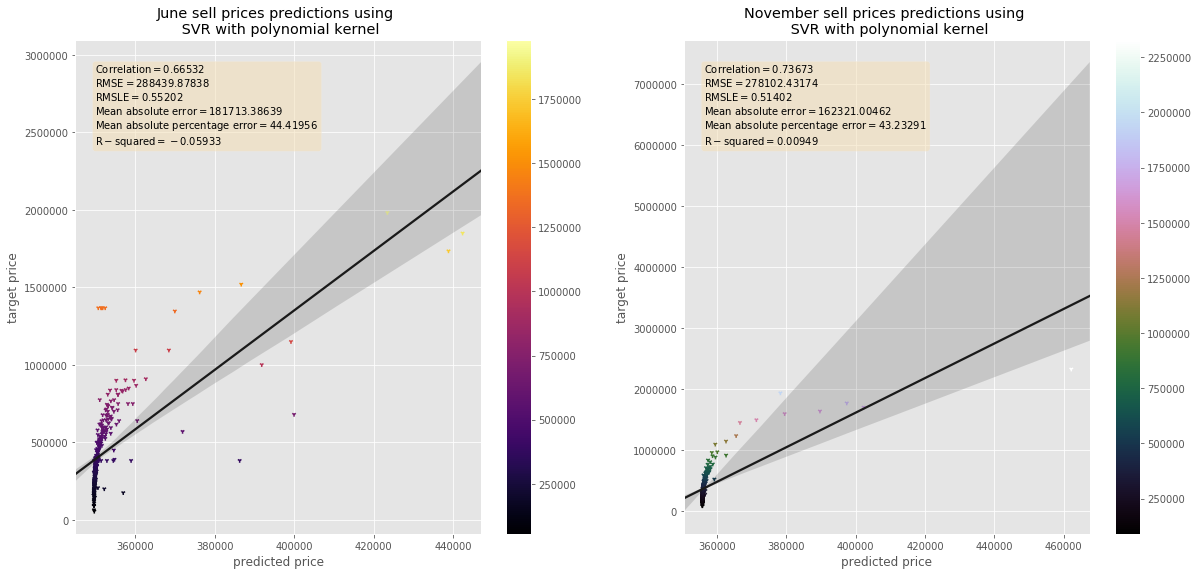

In [65]:
svr_model = SVR(kernel='poly', C=1.0, epsilon=0.2)

y_june, y_november, r_sq = get_results_given_model(svr_model, svr_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n SVR with polynomial kernel", r_sq)

## Regression models which use bagging techniques

### Random Forest

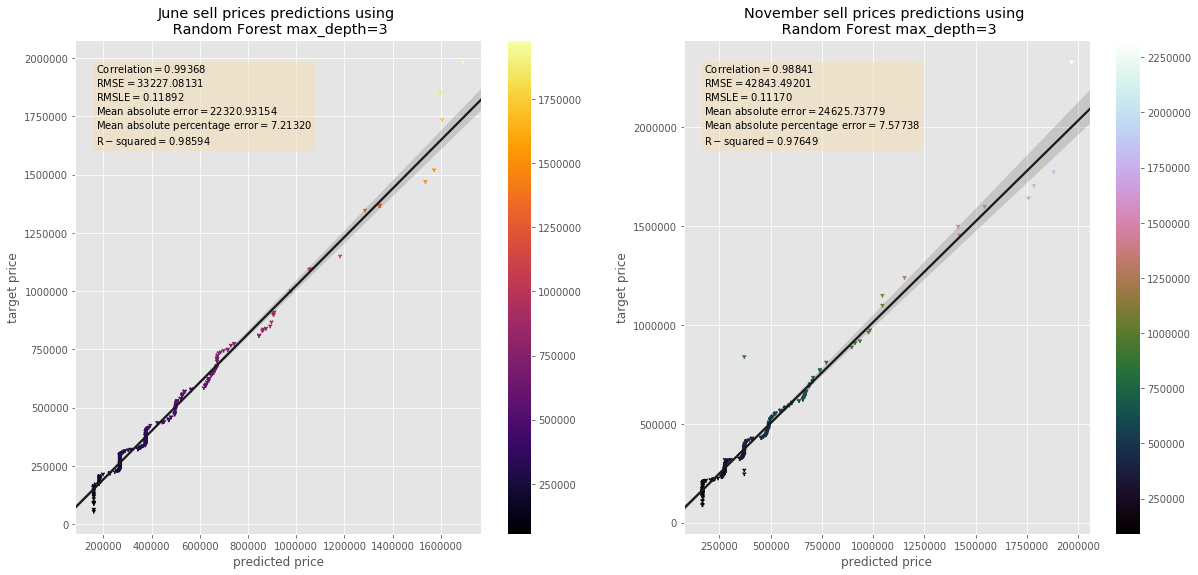

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=3, random_state=0)

y_june, y_november, r_sq = get_results_given_model(rf_model, rf_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n Random Forest max_depth=3", r_sq)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:27<00:00,  1.79it/s]


2 35


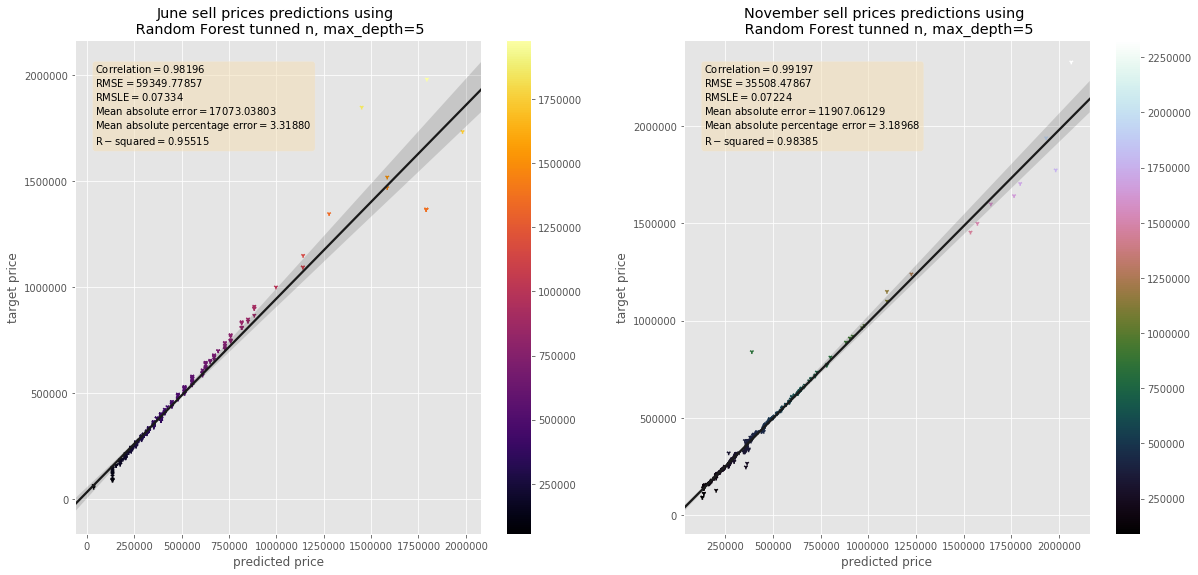

In [67]:
import tqdm 

def get_rmsles_rf_regressor_given_n(n_estimators, max_depth=None):
    rf_model = RandomForestRegressor(n_estimators = n_estimators, random_state = 42)
    y_june, y_november, r_sq = get_results_given_model(rf_model, rf_model,
                                                       relevant_features_from_encoded_df, 
                                                       relevant_features_from_encoded_df)
    
    return [rmsle(y_june[0], y_june[1]), rmsle(y_november[0], y_november[1])]
    
rmsles_june = []
rmsles_november = []
for i in tqdm.tqdm(range(50)):
    rmsles = get_rmsles_rf_regressor_given_n(i + 1)
    rmsles_june.append(rmsles[0])
    rmsles_november.append(rmsles[1])
    
best_n_june = np.argmin(rmsles_june) + 1
best_n_november = np.argmin(rmsles_november) + 1

print(best_n_june, best_n_november)

rf_model_june = RandomForestRegressor(n_estimators=best_n_june, max_depth=5, random_state=0)
rf_model_november = RandomForestRegressor(n_estimators=best_n_november, max_depth=5, random_state=0)

y_june, y_november, r_sq = get_results_given_model(rf_model_june, rf_model_november,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n Random Forest tunned n, max_depth=5", r_sq)

### ExtraTrees

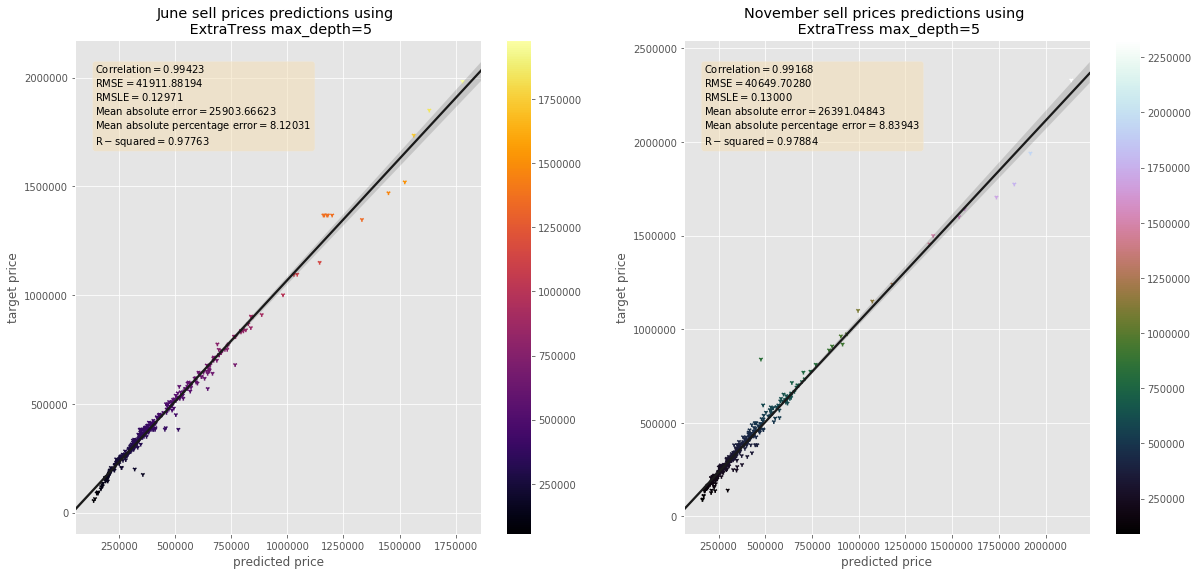

In [68]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor(random_state=0, max_depth=5)

y_june, y_november, r_sq = get_results_given_model(et_model, et_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n ExtraTress max_depth=5", r_sq)

## Regression models which use boosting techniques

### XGBoost

[18:04:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


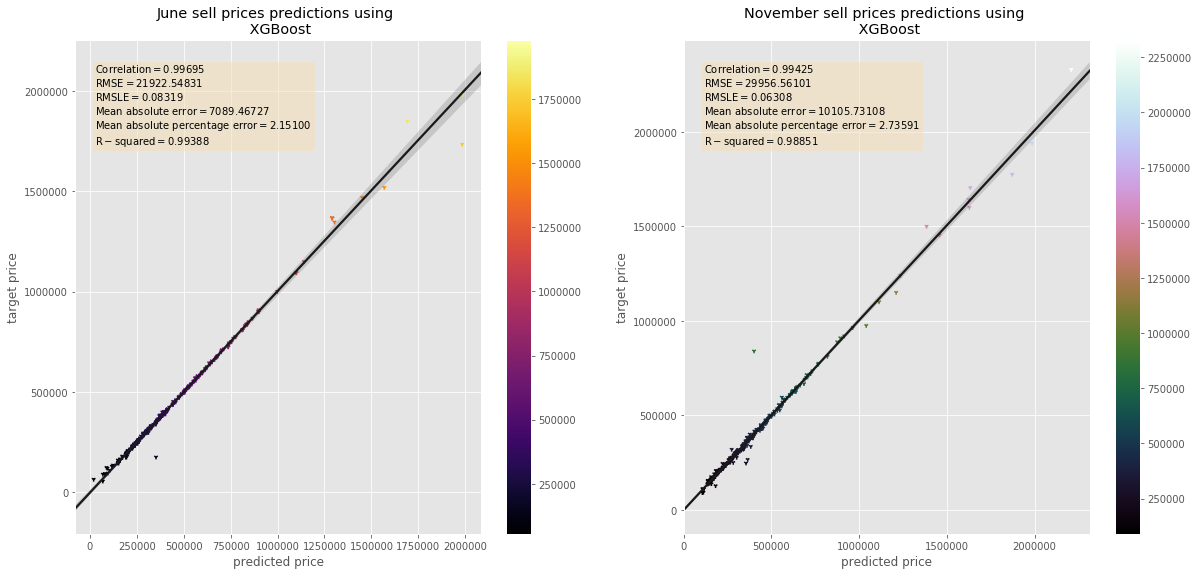

In [69]:
from xgboost import XGBRegressor

xgbreg_model = XGBRegressor()

y_june, y_november, r_sq = get_results_given_model(xgbreg_model, xgbreg_model,
                                                   relevant_features_from_encoded_df, 
                                                   relevant_features_from_encoded_df)

return_regression_results(y_june, y_november, [2, 3], "\n XGBoost", r_sq)

## Overview on the constructed models. Which is the best one?

In [70]:
pd.DataFrame({'Regressor':['Linear Regression without RFE',
                            'Linear Regression with RFE (30 features only)',
                            'Lasso regression',
                            '3-NN',
                            'Decission Tree Classifier (without prunning)', 
                            'Decission Tree Classifier max_depth=10',
                            'MLP Adam + ReLu', 
                            'SVR poly kernel',
                            'Random Forest', 
                            'Extratrees', 
                            'XGBoost'],
             'RMSLE_June_pred': [0.02842, 0.44655, 0.02810, 0.12879, 0.11904, 0.10010, 0.03400,
                                 0.55202, 0.07334, 0.12971, 0.08319]}).sort_values(by=['RMSLE_June_pred'], 
                                                                                  ascending=True)

,Regressor,RMSLE_June_pred
2,Lasso regression,0.02810
0,Linear Regression without RFE,0.02842
6,MLP Adam + ReLu,0.03400
8,Random Forest,0.07334
10,XGBoost,0.08319
5,Decission Tree Classifier max_depth=10,0.10010
4,Decission Tree Classifier (without prunning),0.11904
3,3-NN,0.12879
9,Extratrees,0.12971
1,Linear Regression with RFE (30 features only),0.44655


In [71]:
pd.DataFrame({'Regressor':['Linear Regression without RFE',
                            'Linear Regression with RFE (30 features only)',
                            'Lasso regression',
                            '1-NN',
                            'Decission Tree Classifier (without prunning)', 
                            'Decission Tree Classifier max_depth=6',
                            'MLP Adam + ReLu', 
                            'SVR poly kernel',
                            'Random Forest', 
                            'Extratrees', 
                            'XGBoost'],
             'RMSLE_November_pred': [0.06654, 0.33572, 0.06641, 0.09941, 0.07110, 0.08638, 0.05963, 
                                     0.51402, 0.07224, 0.13000, 0.06308]}).sort_values(by=['RMSLE_November_pred'], 
                                                                                  ascending=True)

,Regressor,RMSLE_November_pred
6,MLP Adam + ReLu,0.05963
10,XGBoost,0.06308
2,Lasso regression,0.06641
0,Linear Regression without RFE,0.06654
4,Decission Tree Classifier (without prunning),0.07110
8,Random Forest,0.07224
5,Decission Tree Classifier max_depth=6,0.08638
3,1-NN,0.09941
9,Extratrees,0.13000
1,Linear Regression with RFE (30 features only),0.33572


## References

1. **SVR**: _https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html_
2. **Random Forest Regressor**: _https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html_
3. **ExtraTreesRegressor**: _https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html_
4. **XGBRegressor**: _https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/_